In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
telco_base_data=pd.read_csv('churn.csv')
#loading the file

In [7]:
telco_base_data.head()
#looking at the top 5 records of  the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
telco_base_data.shape

#checking no. of rows and columns

(7043, 21)

In [9]:
telco_base_data.columns.values
#checking columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
telco_base_data.dtypes
#checking data types of columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
telco_base_data.describe()
#viewing statictics of numerical data

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
telco_base_data['Churn'].value_counts()
#count of YES and NO 

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
#clearly it is a imbalance data as no. of NO is much greater than no. of YES

In [14]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])
#YES ,NO percentage

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [15]:
#Yes:NO ratio is appx 27:73 , highly imbalanced

In [16]:
telco_base_data.info(verbose=True)
#viewing no of non null objects in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
telco_base_data.TotalCharges=pd.to_numeric(telco_base_data.TotalCharges,errors='coerce')
telco_base_data.isnull().sum()
#converting onject data into numeric and again finding null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#11 values are null values, viewing in records

In [19]:
telco_base_data.loc[telco_base_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [20]:
#only 11 missing valuess, ie. 0.15% so dropping these rows
telco_base_data.dropna(how='any',inplace=True)


In [21]:
# creating bins/groups for tenure for easy analysis

In [22]:
#finding max of tenure
print(telco_base_data['tenure'].max())

72


In [23]:
#making groups of 12 months
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
telco_base_data['tenure_group']=pd.cut(telco_base_data.tenure,range(1,80,12), right=False,labels=labels)

In [24]:
telco_base_data['tenure_group'].value_counts()


tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [25]:
# removing useless columns , for ex - name, customer id


In [26]:
telco_base_data.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
telco_base_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [27]:
# data exploration


In [28]:
#univariate analysis


C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Aditya\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


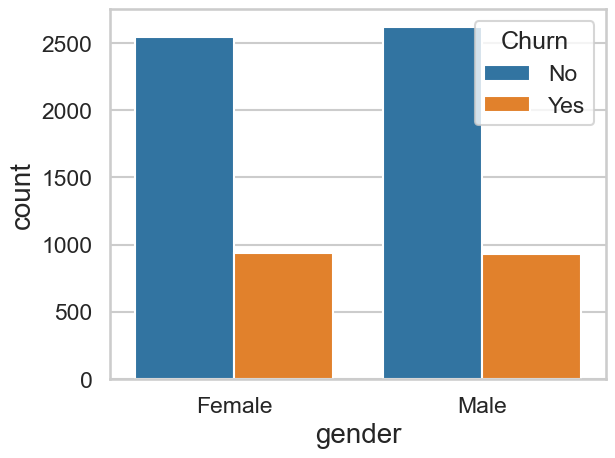

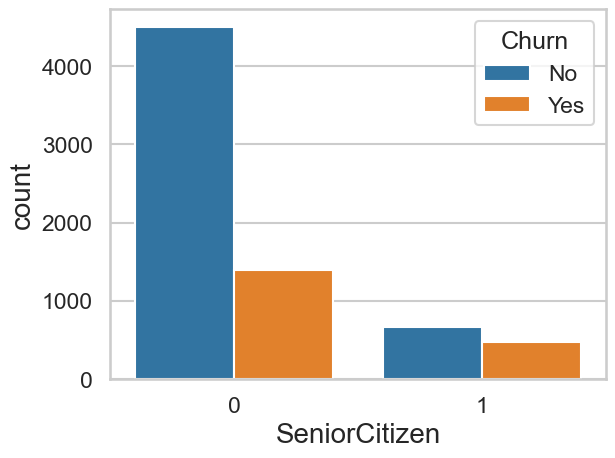

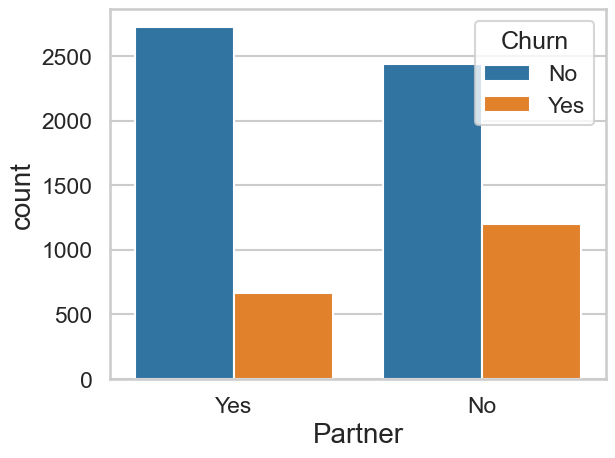

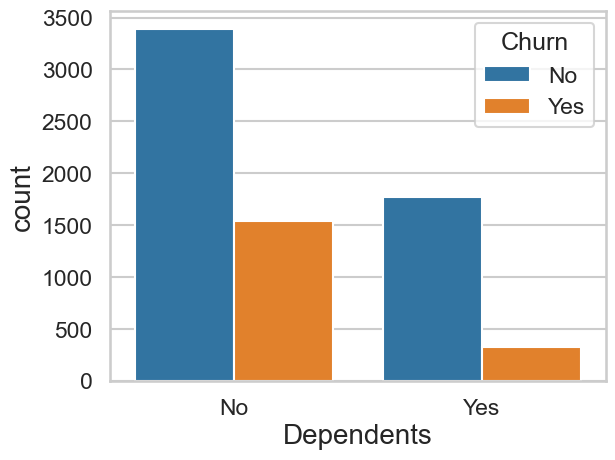

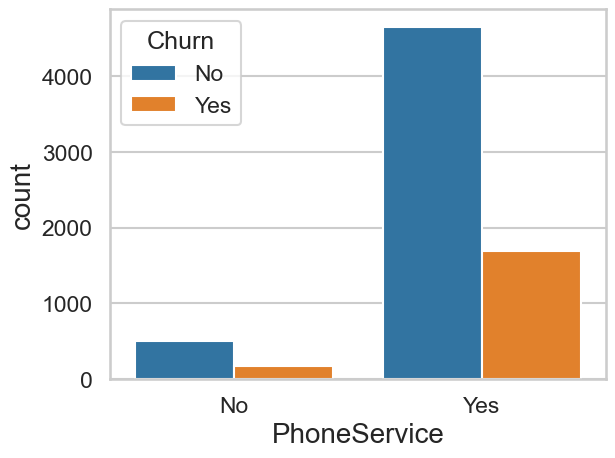

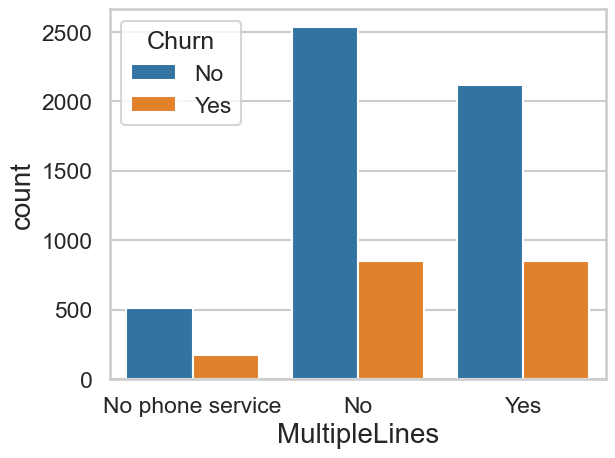

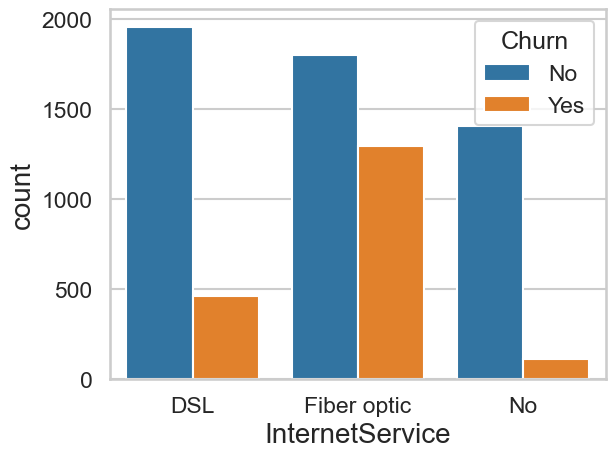

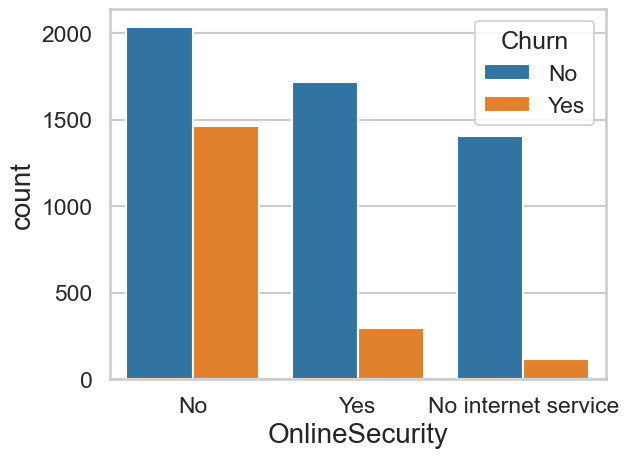

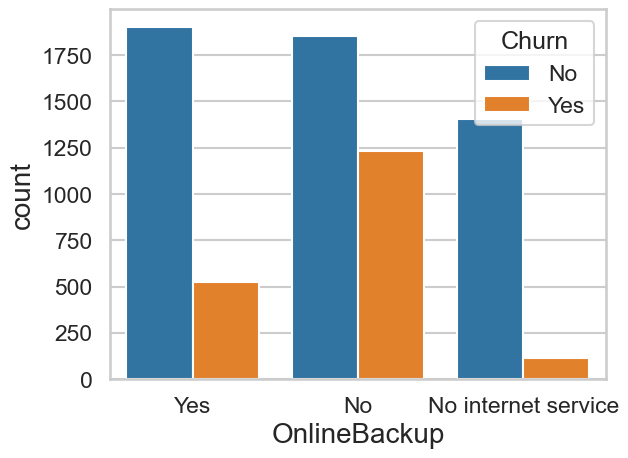

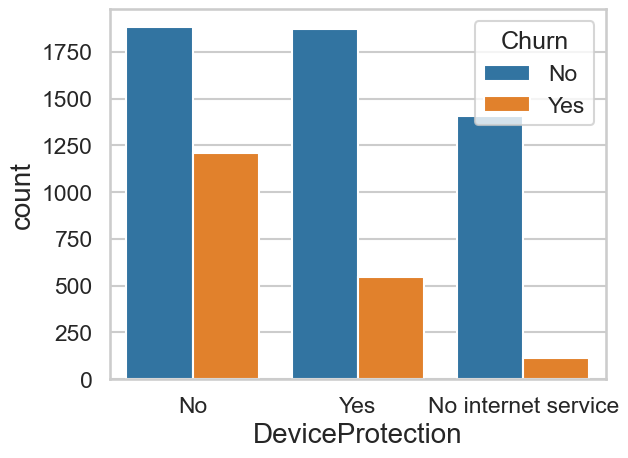

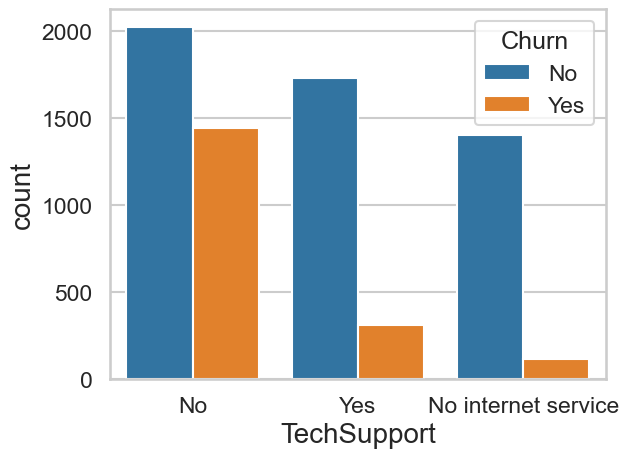

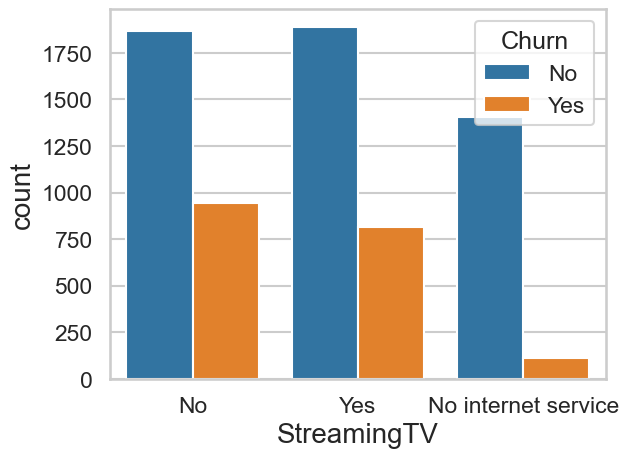

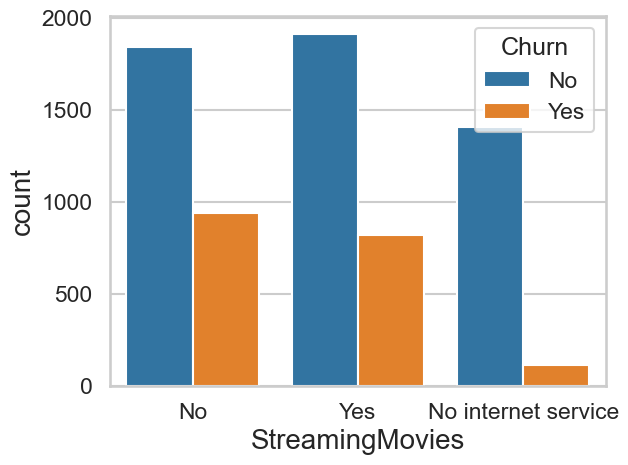

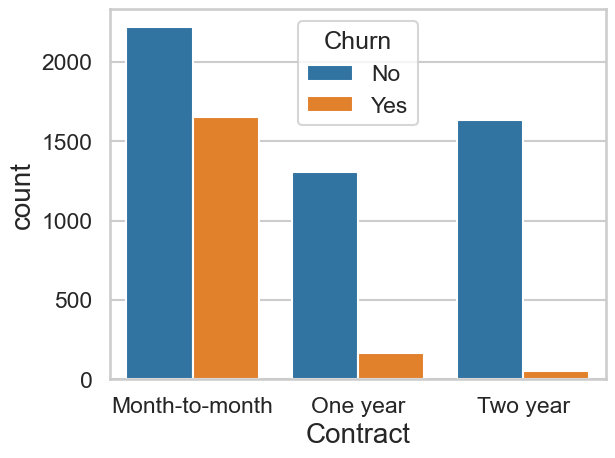

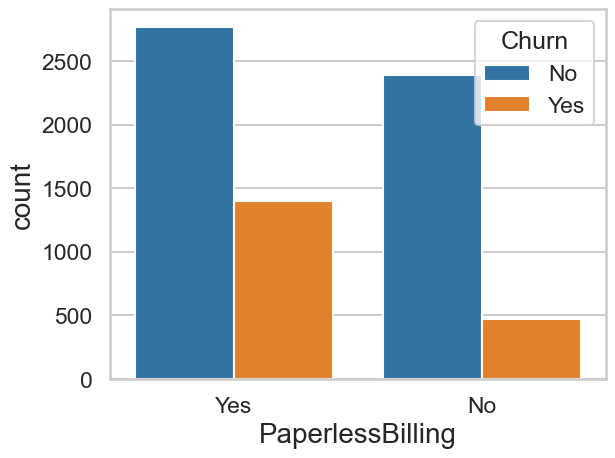

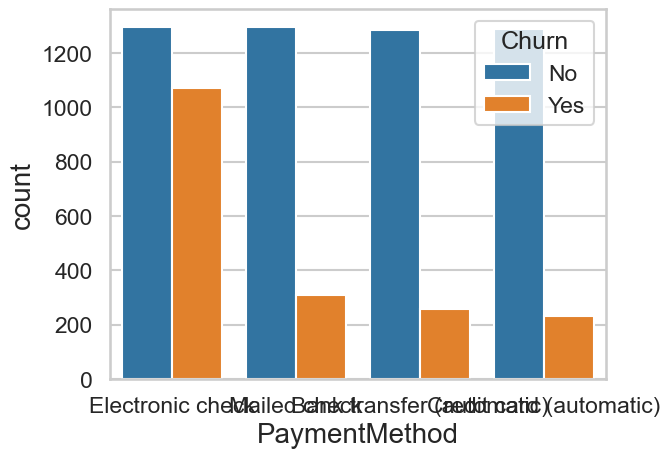

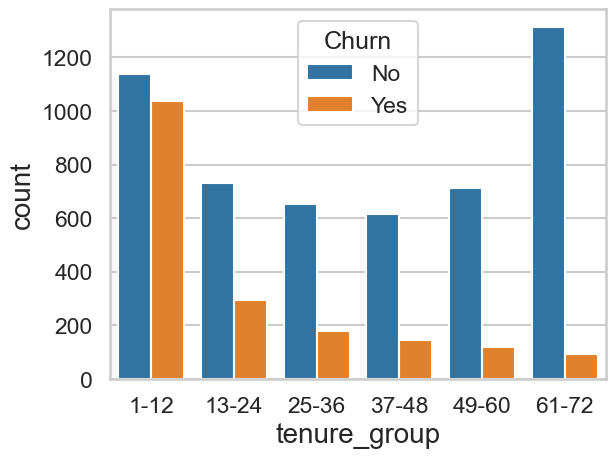

In [151]:
#plotting count of churners and non churners wrt each column
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
   plt.figure(i)
   sns.countplot(data=telco_base_data,x=predictor,hue='Churn')

In [31]:
#one hot encoding
'''telco_data_dummies=pd.get_dummies(telco_base_data)
telco_data_dummies.head()'''

'telco_data_dummies=pd.get_dummies(telco_base_data)\ntelco_data_dummies.head()'

In [32]:
#relationship bw monthly charges and total charges
#sns.lmplot(data=telco_data_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [33]:
#total charges increases as monthly charges increases, highly correlated

In [34]:
#plt.figure(figsize=(12,12))
#sns.heatmap(telco_data_dummies.corr(),cmap="brg_r")

In [35]:
#bivariate analysis

In [36]:

new_df1_target0=telco_base_data.loc[telco_base_data["Churn"]==0]
new_df1_target1=telco_base_data.loc[telco_base_data["Churn"]==1]

In [37]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

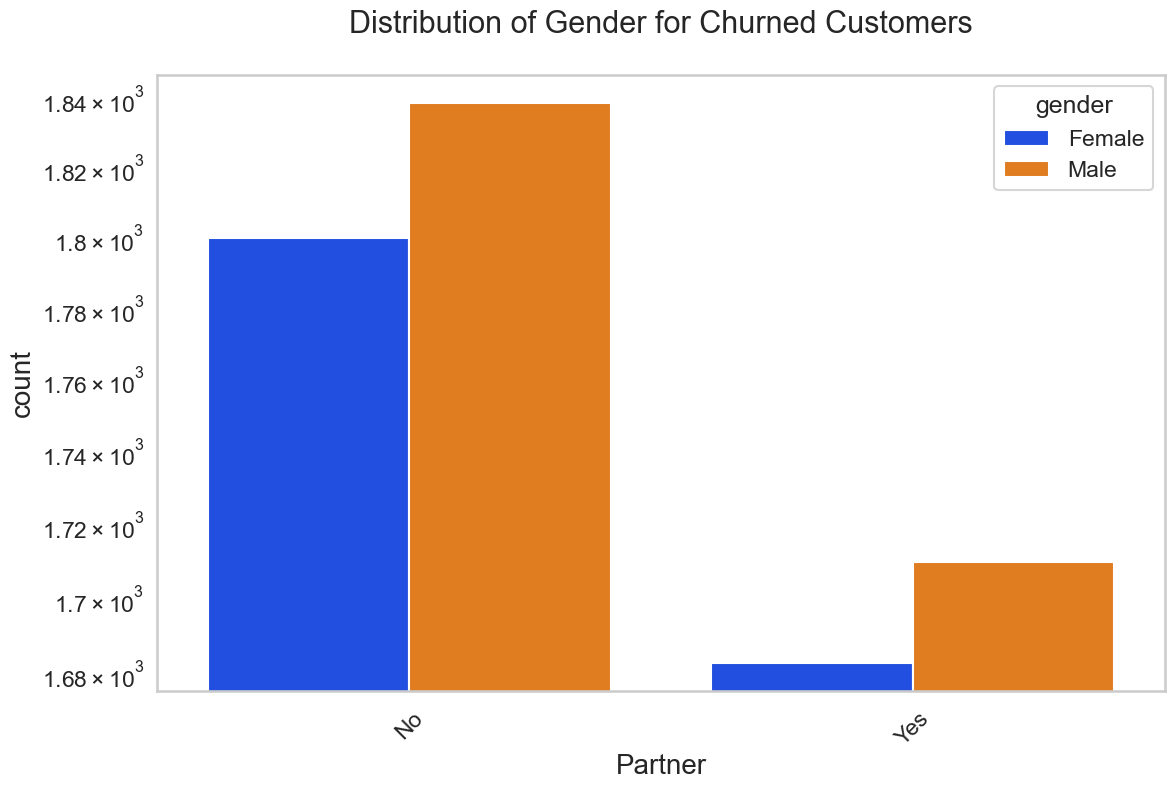

In [38]:
uniplot(telco_base_data,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

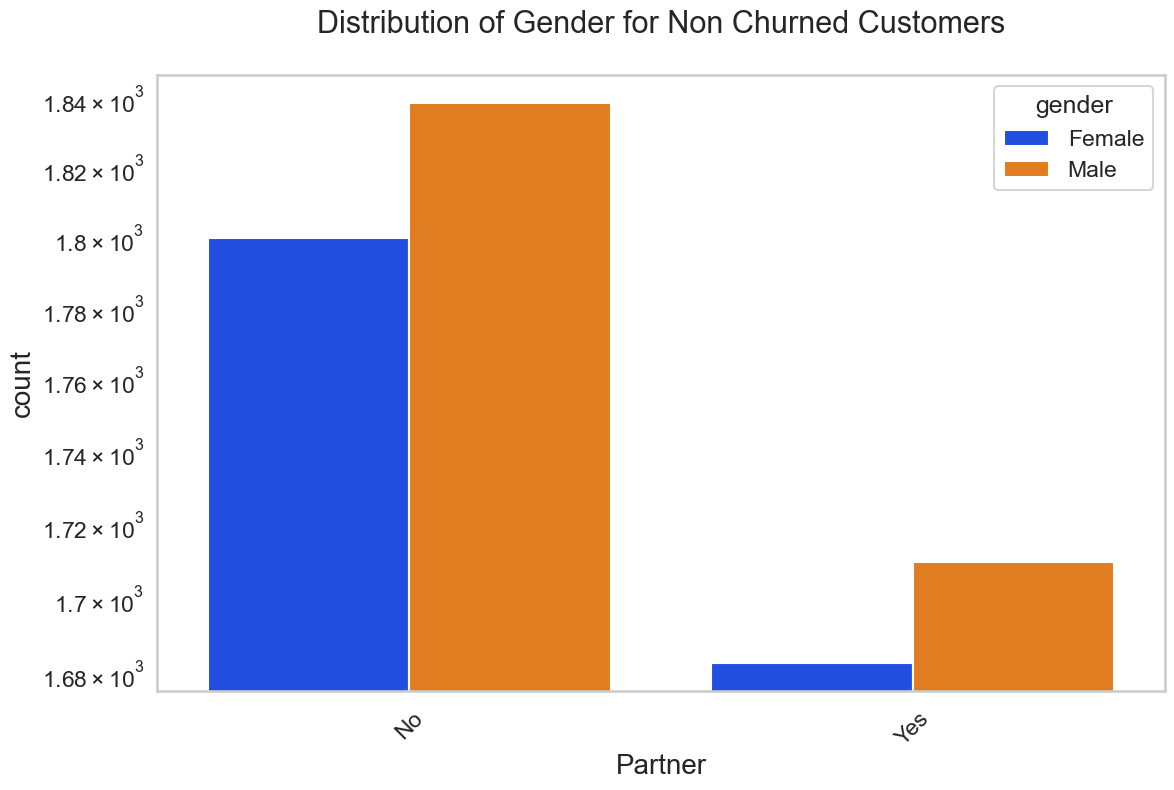

In [39]:
uniplot(telco_base_data,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

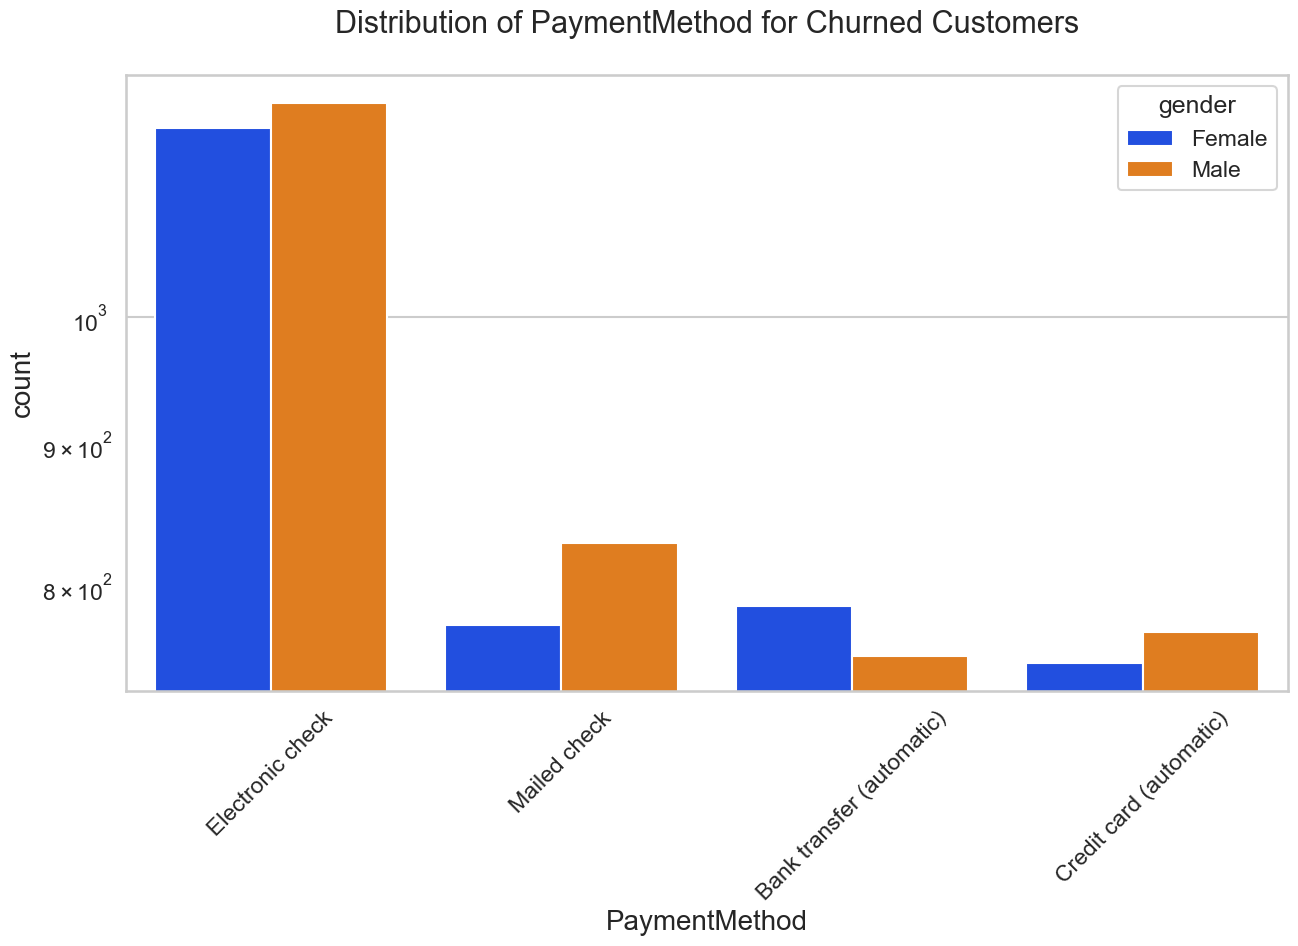

In [40]:
uniplot(telco_base_data,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

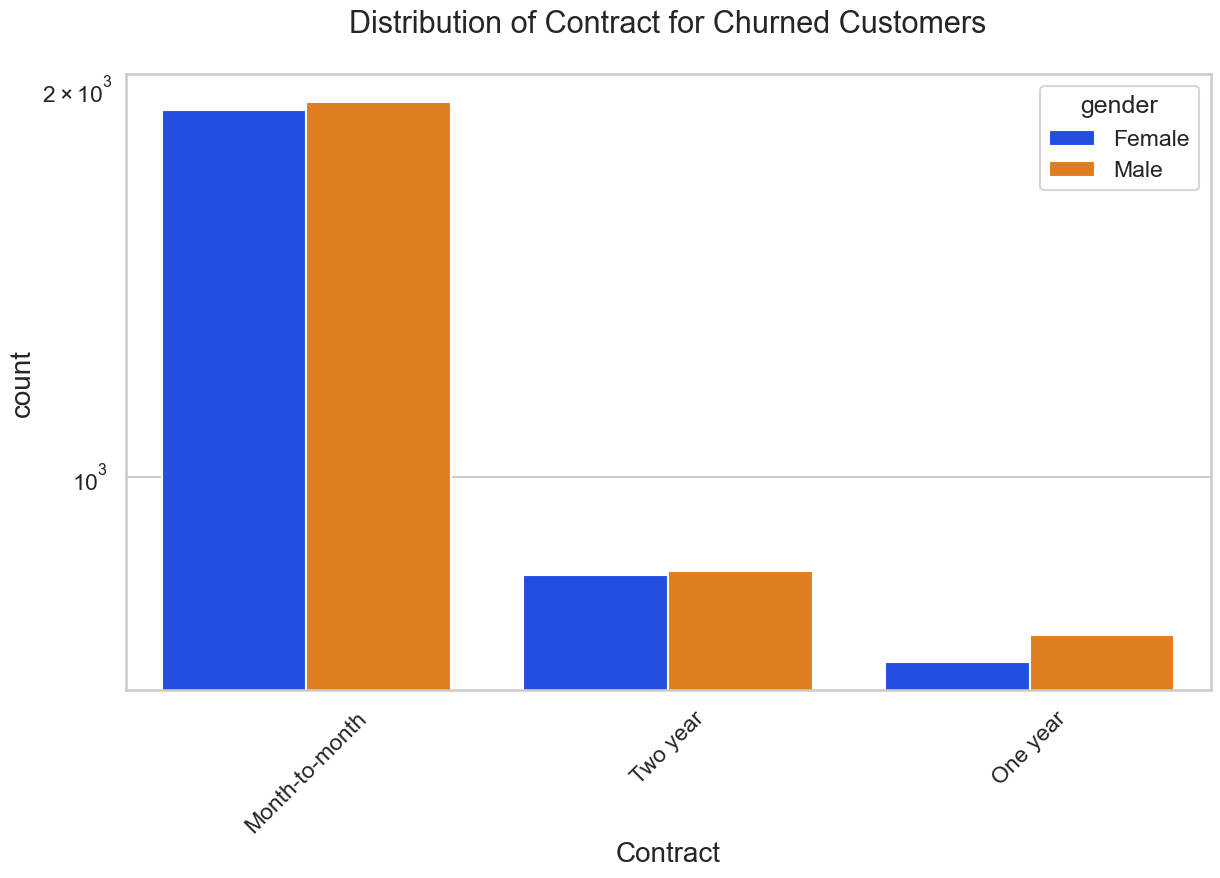

In [41]:
uniplot(telco_base_data,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

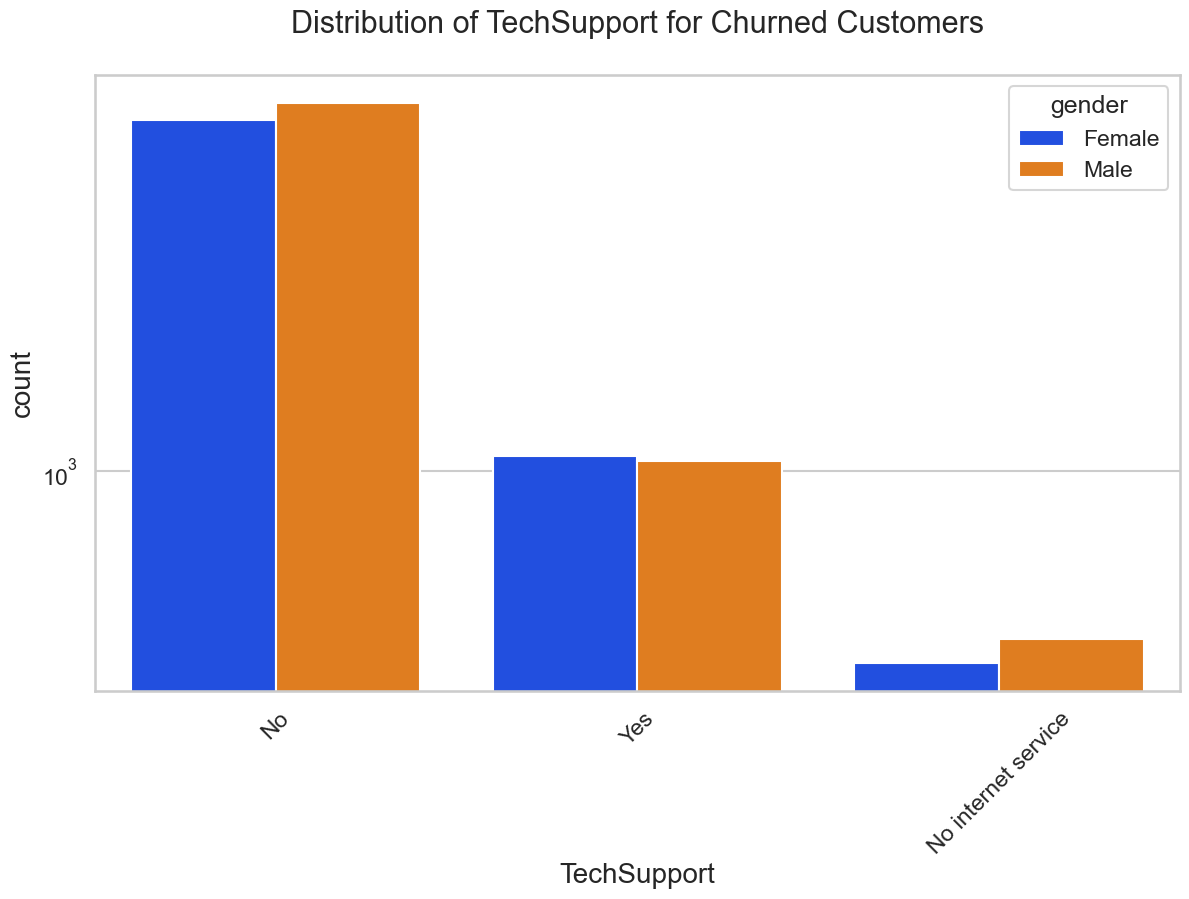

In [42]:
uniplot(telco_base_data,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

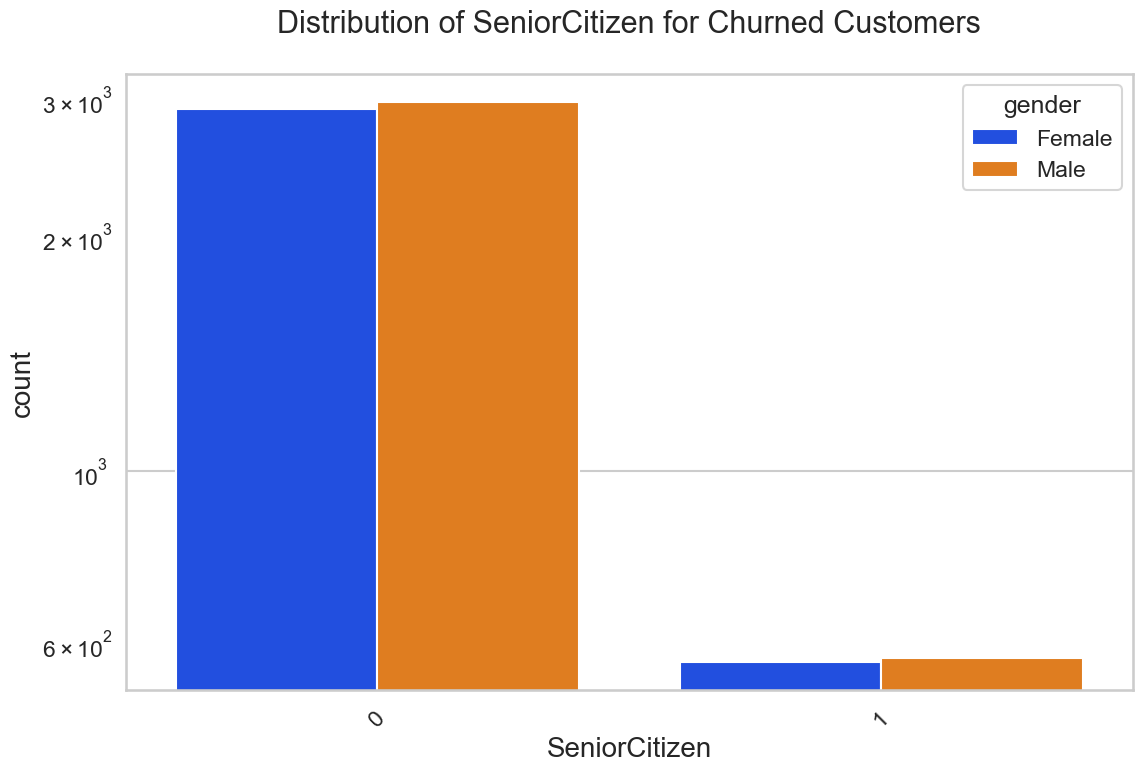

In [43]:
uniplot(telco_base_data,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

In [44]:
#Electronic check medium are the highest churners
#Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
#No Online security, No Tech Support category are high churners
#Non senior Citizens are high churners

# Model building


In [46]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [47]:
#reading the database

df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [93]:
#deleting extra column unnamed
df=df.drop('Unnamed: 0',axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [95]:
#creating x variable
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [97]:
#creating y variable
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [98]:
#Train Test Split 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

In [100]:
#calling decision tree classifier
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [101]:
#fitting
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [102]:
#predicted values
y_pred=model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
#comparing predicted and actual values
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1042
           1       0.59      0.53      0.56       365

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [104]:
#upsampling to improve performance

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_resampled, y_resampled= oversample.fit_resample(x, y)


In [105]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [106]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [107]:
# values improved
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.8291384317521782
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1012
           1       0.83      0.84      0.83      1054

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [108]:

print(metrics.confusion_matrix(yr_test, yr_predict))

[[825 187]
 [166 888]]


# random forest classifier

In [110]:

from sklearn.ensemble import RandomForestClassifier

In [111]:

model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [112]:

model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [113]:

y_pred=model_rf.predict(x_test)

In [114]:
model_rf.score(x_test,y_test)

0.8052594171997157

In [115]:
print(classification_report(y_test, y_pred, labels=[0,1]))
# results are not very good

              precision    recall  f1-score   support

           0       0.84      0.92      0.87      1042
           1       0.67      0.49      0.57       365

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.81      0.79      1407



In [123]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [125]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [126]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [127]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [128]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [129]:

model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [130]:

print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9426860564585116
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       493
           1       0.94      0.97      0.95       676

    accuracy                           0.94      1169
   macro avg       0.94      0.94      0.94      1169
weighted avg       0.94      0.94      0.94      1169



In [131]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[448  45]
 [ 22 654]]


In [133]:
#With RF Classifier, also we are able to get quite good results, infact better than Decision Tree

# saving model with pickle


In [136]:

import pickle


In [137]:

filename = 'model.sav'

In [138]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [139]:
load_model = pickle.load(open(filename, 'rb'))

In [140]:

model_score_r1 = load_model.score(xr_test1, yr_test1)

In [141]:
model_score_r1

0.9426860564585116